#**Import Library**

In [1]:
import os
import zipfile
import shutil
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

#**Data Loading**

In [2]:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/file/d/1zzwOt_wTVRMSo6Jd2zjCHjsQbzDfDpXf/view?usp=sharing'

In [4]:
# fluff, id = link.split('d/')
id = link.split('d/')[1].split('/view?')[0]
print (id)

1zzwOt_wTVRMSo6Jd2zjCHjsQbzDfDpXf


In [5]:
downloaded = drive.CreateFile({'id':id})  #drive from PyDrive
downloaded.GetContentFile('LettuceDataset.zip')

In [6]:
file_zip = 'LettuceDataset.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('./LettuceDataset/')
zip_ref.close()

print(os.listdir('./LettuceDataset/'))

['Selada Green Romaine', 'Selada Hijau new grand rapids', 'Selada Red Romaine', 'Selada Butterhead', 'Selada Merah red Rapids', 'Selada Keriting oakleaf green']


#**Exploratory Data Analysis**

In [7]:
listdir_image = os.listdir('LettuceDataset')
print(listdir_image)

['Selada Green Romaine', 'Selada Hijau new grand rapids', 'Selada Red Romaine', 'Selada Butterhead', 'Selada Merah red Rapids', 'Selada Keriting oakleaf green']


In [8]:
# check the amount of data for each part
dir_image = './LettuceDataset/'

for item in listdir_image:
  class_dir = os.path.join(dir_image,item)
  print(item, " : ",len(os.listdir(class_dir)),"images")

Selada Green Romaine  :  40 images
Selada Hijau new grand rapids  :  44 images
Selada Red Romaine  :  40 images
Selada Butterhead  :  43 images
Selada Merah red Rapids  :  44 images
Selada Keriting oakleaf green  :  42 images


In [ ]:
# delete directory that is not used
#list_category = ['Selada Green Romaine', 'Selada Hijau new grand rapids', 'Selada Red Romaine',
#                 'Selada Butterhead', 'Selada Merah red Rapids', 'Selada Keriting oakleaf green']

#for x in listdir_image:
#  if x not in list_category:
#    path = os.path.join(dir_image, x)
#        if os.path.isfile(path):
#        os.remove(path)
#    elif os.path.isdir(path):
#        shutil.rmtree(path)
#    else:
#        print("Unknown or already remove!")

#listdir_image = os.listdir(dir_image)
#listdir_image


In [9]:
# check image(count, size, total)
from PIL import Image
total = 0
size = (0,0)

for x in listdir_image:
  dir = os.path.join(dir_image,x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total += y

  img_name = os.listdir(dir)
  for i in range(5):
    img_path = os.path.join(dir, img_name[i])
    img = Image.open(img_path)

    if size == img.size:
      continue
    else:
      size = img.size
      print('+ size', img.size)

print('\nTotal: ', total)

Selada Green Romaine: 40
+ size (3072, 2304)
+ size (701, 583)
+ size (900, 950)
+ size (5184, 3456)
+ size (650, 442)
Selada Hijau new grand rapids: 44
+ size (755, 750)
+ size (577, 433)
+ size (893, 670)
+ size (500, 500)
+ size (577, 433)
Selada Red Romaine: 40
+ size (1280, 1280)
+ size (1000, 1000)
+ size (416, 416)
+ size (800, 800)
+ size (1280, 960)
Selada Butterhead: 43
+ size (233, 233)
+ size (297, 225)
+ size (900, 900)
+ size (224, 225)
+ size (224, 224)
Selada Merah red Rapids: 44
+ size (563, 422)
+ size (577, 433)
+ size (400, 400)
+ size (570, 350)
+ size (640, 640)
Selada Keriting oakleaf green: 42
+ size (259, 194)
+ size (225, 225)
+ size (251, 250)
+ size (380, 225)
+ size (200, 200)

Total:  253


Selada Green Romaine


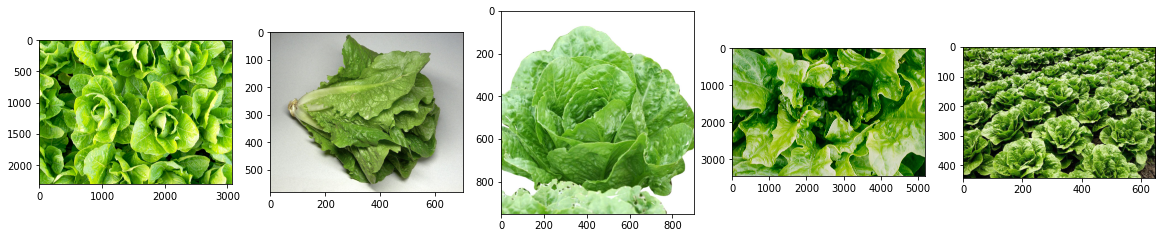

Selada Hijau new grand rapids


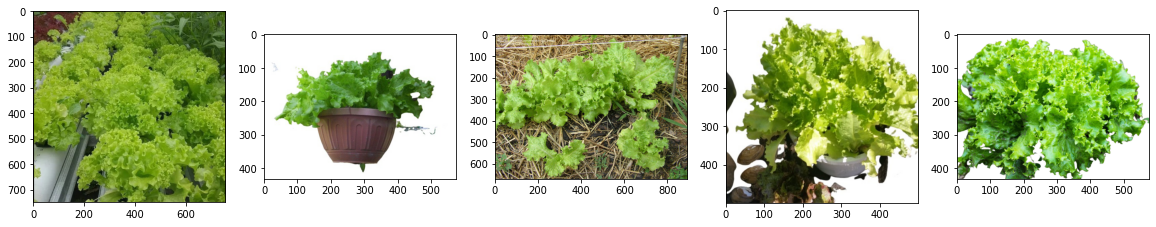

Selada Red Romaine


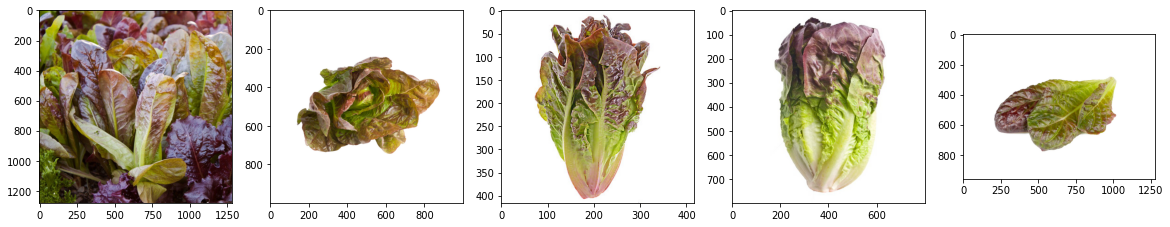

Selada Butterhead


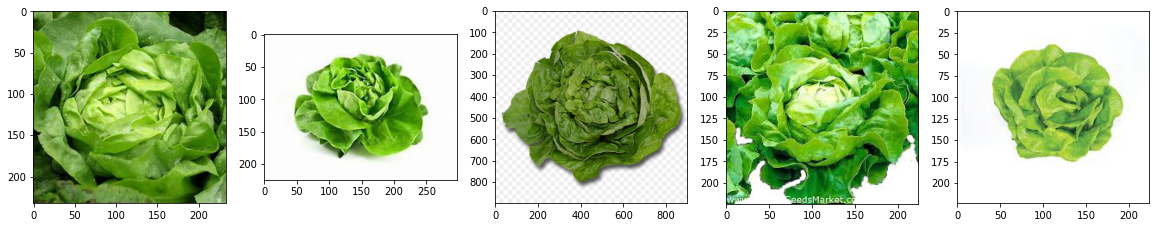

Selada Merah red Rapids


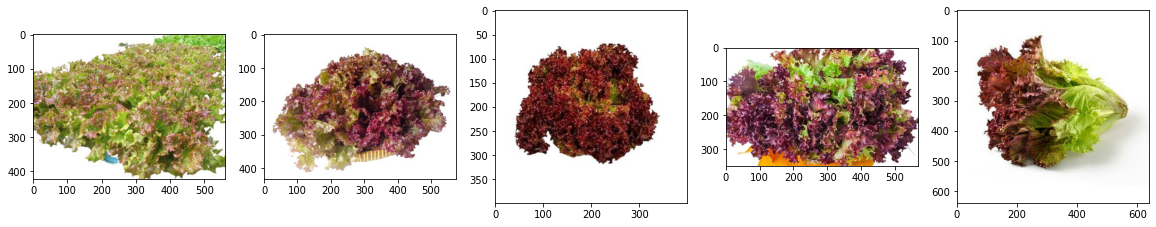

Selada Keriting oakleaf green


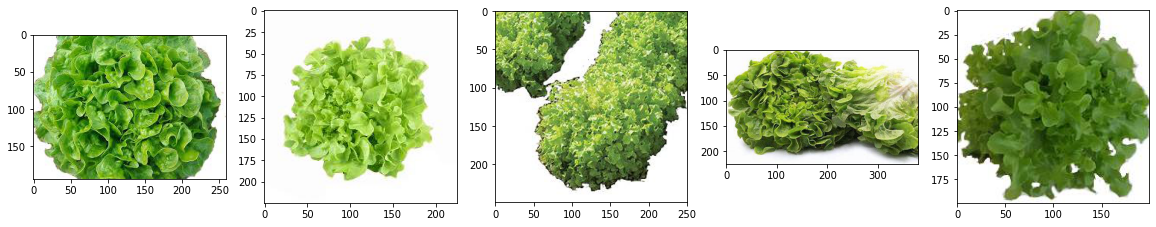

In [10]:
# check image class
for item in listdir_image:
  print(item)
  class_dir = os.path.join(dir_image, item)
  class_image = os.listdir(class_dir)
  plt.figure(figsize=(20,4))
  for i, img_path in enumerate(class_image[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()